In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games, aggregate_coverages

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(17):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['SEA']

In [13]:
team.games

{'week2': <src.game.Game at 0x1a2472b898>,
 'week3': <src.game.Game at 0x1a24743e80>,
 'week4': <src.game.Game at 0x11019edd8>,
 'week5': <src.game.Game at 0x1101bf940>,
 'week6': <src.game.Game at 0x1a24791898>,
 'week8': <src.game.Game at 0x1a247be0b8>,
 'week9': <src.game.Game at 0x1a247da160>,
 'week10': <src.game.Game at 0x1a247ed898>,
 'week11': <src.game.Game at 0x1a247f6160>,
 'week12': <src.game.Game at 0x1a24807dd8>,
 'week13': <src.game.Game at 0x1a24835160>,
 'week14': <src.game.Game at 0x1a24846e80>,
 'week15': <src.game.Game at 0x1a248630b8>,
 'week16': <src.game.Game at 0x1a24875be0>,
 'week17': <src.game.Game at 0x1a2488f6a0>}

In [14]:
team.process_weeks(weeks)

week1
week2


/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/

week3
week4
week5
week6
week7
week8
week9
week10
week11
week12
week13
week14
week15
week16
week17


In [15]:
for game in team.games.values():
    game.process_plays(players)

In [16]:
game_coverages = []

for game in team.games.values():
    _coverage = game.classify_defensive_back_coverages(positions='CB',useId=True)
    game_coverages.append(_coverage)

In [17]:
season_coverages = aggregate_coverages(coverages=game_coverages)

In [18]:
season_coverages

{2553456: {'snaps': 81,
  'zone': 6,
  'zone-deep': 9,
  'zone-over': 25,
  'man': 27,
  'man-over': 9,
  'blitz': 5,
  'games played': 8},
 2558259: {'snaps': 489,
  'zone': 50,
  'zone-deep': 70,
  'zone-over': 112,
  'man': 168,
  'man-over': 85,
  'blitz': 4,
  'games played': 15},
 2553637: {'snaps': 404,
  'zone': 57,
  'zone-deep': 19,
  'zone-over': 171,
  'man': 44,
  'man-over': 94,
  'blitz': 19,
  'games played': 15},
 2560728: {'snaps': 471,
  'zone': 36,
  'zone-deep': 91,
  'zone-over': 96,
  'man': 175,
  'man-over': 72,
  'blitz': 1,
  'games played': 14},
 2534846: {'snaps': 16,
  'zone': 1,
  'zone-deep': 1,
  'zone-over': 4,
  'man': 4,
  'man-over': 6,
  'blitz': 0,
  'games played': 3}}

In [19]:
df = pd.DataFrame.from_dict(season_coverages, orient='index')

In [20]:
df

,snaps,zone,zone-deep,zone-over,man,man-over,blitz,games played
2553456,81,6,9,25,27,9,5,8
2558259,489,50,70,112,168,85,4,15
2553637,404,57,19,171,44,94,19,15
2560728,471,36,91,96,175,72,1,14
2534846,16,1,1,4,4,6,0,3


In [21]:
players.head()

,height,weight,birthDate,collegeName,position,displayName
nflId,,,,,,
2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [22]:
df = pd.merge(players[['displayName','position']],df,left_index=True,right_index=True)

In [23]:
df

,displayName,position,snaps,zone,zone-deep,zone-over,man,man-over,blitz,games played
2553456,Akeem King,CB,81,6,9,25,27,9,5,8
2553637,Justin Coleman,CB,404,57,19,171,44,94,19,15
2558259,Shaquill Griffin,CB,489,50,70,112,168,85,4,15
2560728,Tre Flowers,CB,471,36,91,96,175,72,1,14
2534846,Neiko Thorpe,CB,16,1,1,4,4,6,0,3


coverage_names = ('zone','zone-deep','zone-over','man','man-over','blitz')

for key in coverage_names:
    df[key] /= df['snaps']

In [24]:
df

,displayName,position,snaps,zone,zone-deep,zone-over,man,man-over,blitz,games played
2553456,Akeem King,CB,81,6,9,25,27,9,5,8
2553637,Justin Coleman,CB,404,57,19,171,44,94,19,15
2558259,Shaquill Griffin,CB,489,50,70,112,168,85,4,15
2560728,Tre Flowers,CB,471,36,91,96,175,72,1,14
2534846,Neiko Thorpe,CB,16,1,1,4,4,6,0,3


In [25]:
SNAP_THRESHOLD = 50

In [26]:
df = df[df['snaps'] > SNAP_THRESHOLD]

In [27]:
df['Team'] = team.abbr

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df

,displayName,position,snaps,zone,zone-deep,zone-over,man,man-over,blitz,games played,Team
2553456,Akeem King,CB,81,6,9,25,27,9,5,8,SEA
2553637,Justin Coleman,CB,404,57,19,171,44,94,19,15,SEA
2558259,Shaquill Griffin,CB,489,50,70,112,168,85,4,15,SEA
2560728,Tre Flowers,CB,471,36,91,96,175,72,1,14,SEA


In [29]:
df.index

Int64Index([2553456, 2553637, 2558259, 2560728], dtype='int64')

In [30]:
s = df.loc[df.index[3]]
s

displayName     Tre Flowers
position                 CB
snaps                   471
zone                     36
zone-deep                91
zone-over                96
man                     175
man-over                 72
blitz                     1
games played             14
Team                    SEA
Name: 2560728, dtype: object

In [31]:
coverage_names = ('zone','zone-deep','zone-over','man','man-over','blitz')

In [32]:
values = []
for key in coverage_names:
    val = s[key]
    values.append(val)

In [33]:
display_names = []
for name in coverage_names:
    _name=name.title()
    display_names.append(_name)

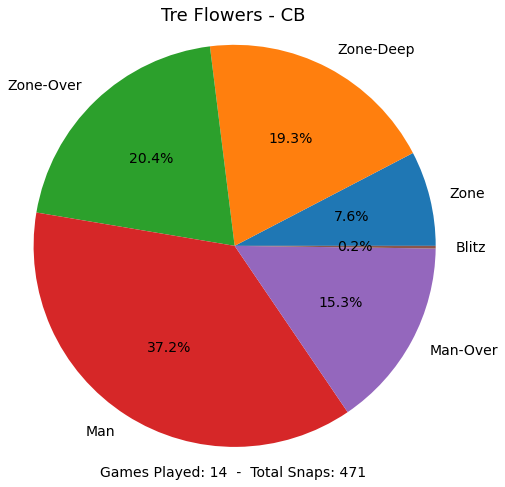

In [36]:
fig, ax = plt.subplots(figsize=(8,8))

ax.pie(values,labels=display_names, autopct='%1.1f%%',textprops={'fontsize': 14})
ax.axis('equal') 

player_name = s['displayName']
player_pos = s['position']
title = f'{player_name} - {player_pos}'
ax.set_title(title,fontsize=18)

nGames = s['games played']
nSnaps = s['snaps']

ax.set_xlabel(f'Games Played: {nGames}  -  Total Snaps: {nSnaps}',fontsize=14)

plt.show()